# Page Rank and HITS

_Deadline: 16.04.2021 at 23:59_

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

This lab will be playing with the algorithms Page Rank and HITS.

## Task 1

First, we shall look at our good friends from this karate club. Let us pick several values for coefficient $\alpha$ and see what we get.

In [ ]:
G = nx.karate_club_graph()

fig = plt.figure(1, figsize=(14,7))

ax = plt.subplot(121) # Plotting PR for several alphas    
alphas = np.arange(0, 1.1, 0.2)
for alp in alphas:
    pr = nx.pagerank(G, alpha=alp)
    prval = pr.values()
    ax.plot(prval, label='alpha {0:.2f}'.format(alp))
ax.legend()

ay = plt.subplot(122) # Plotting Degree centrality
dc = list(nx.degree_centrality(G).values())
ay.plot(dc, label="degree_centrality")
ay.legend()

a) How can you normalize degree centrality so that it sums up to 1? Do it and plot all these on the same plot.

Let's devide each element by sum of all elements, that's way we replace each of them by its part in all sum and together they will give us 1.

In [3]:
dc_normalized = np.array(dc) / (np.array(dc).sum())
dc_normalized

array([0.1025641 , 0.05769231, 0.06410256, 0.03846154, 0.01923077,
       0.02564103, 0.02564103, 0.02564103, 0.03205128, 0.01282051,
       0.01923077, 0.00641026, 0.01282051, 0.03205128, 0.01282051,
       0.01282051, 0.01282051, 0.01282051, 0.01282051, 0.01923077,
       0.01282051, 0.01282051, 0.01282051, 0.03205128, 0.01923077,
       0.01923077, 0.01282051, 0.02564103, 0.01923077, 0.02564103,
       0.02564103, 0.03846154, 0.07692308, 0.10897436])

In [4]:
dc_normalized.sum()

1.0

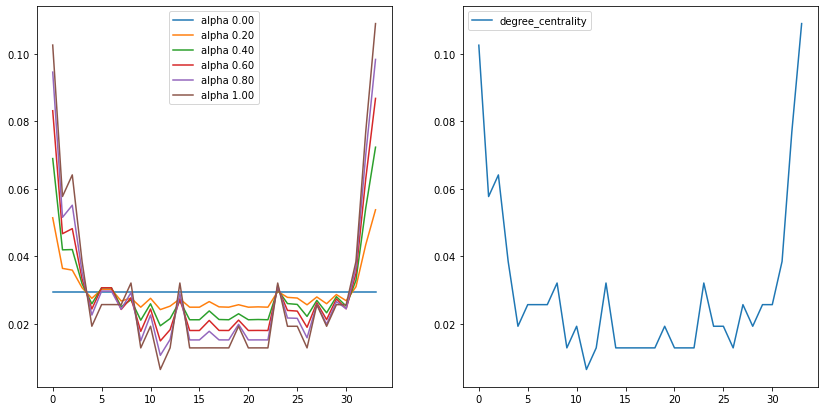

In [5]:
fig = plt.figure(1, figsize=(14,7))

ax = plt.subplot(121) # Plotting PR for several alphas    
alphas = np.arange(0, 1.1, 0.2)
for alp in alphas:
    pr = nx.pagerank(G, alpha=alp)
    prval = pr.values()
    ax.plot(prval, label='alpha {0:.2f}'.format(alp))
ax.legend()

ay = plt.subplot(122) # Plotting Degree centrality
ay.plot(dc_normalized, label="degree_centrality")
ay.legend()
plt.show()

We get the second picture the same, as it without normalization, only scale is different, but the shape doesn't change.

b) In order to see how fast it converges, we shall need to code our own Page Rank algorithm. Code a function ```mypagerank(G,alpha,k)``` which executes the power iteration $k$ times starting from the uniform distribution among nodes in the graph. It should return the list of page rank scores. Recall that
$$ \mathbf{p}^{t+1} = \alpha (D^{-1}A)^{\top}\mathbf{p} + (1-\alpha)\frac{\mathbf{e}}{n}, $$
where $A$ is the adjacency matrix of $G$ and $D$ is the diagonal matrix made of degrees of vertices.

In [6]:
## Reminder: A @ B computes the multiplication of matrices A and B.

def mypagerank(G, alpha, k):
    A = nx.linalg.graphmatrix.adjacency_matrix(G).toarray()
    n = A.shape[0]
    p = np.random.rand(n, 1)
    p = p / np.linalg.norm(p, 1)
    M = (alpha * A + (1 - alpha) / n)
    for _ in range(k):
        p = M @ p
    return p

Alright, let us see how it goes...

c) Plot the results after 0 up to 10 iterations.

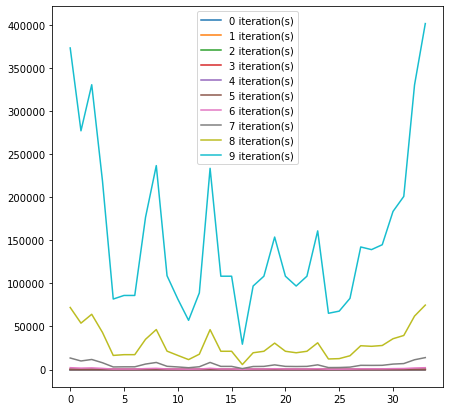

In [7]:
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)    

its = np.arange(0,10, 1)

for it in its:
    pr = mypagerank(G, 0.85, it)
    prval = list(pr)
    ax.plot(prval, label='{:d} iteration(s)'.format(it))
    
ax.legend()

d) Pay attention to the order of colors. What do you observe? How can you explain it?

The graph shows the dependence of precision on the number of iterations, also on 8th and 9th iterations, the differences of pr values are more significant.

e) Plot Page Rank vs Degree Centrality for $\alpha$ in $\{0,0.5,1\}$.

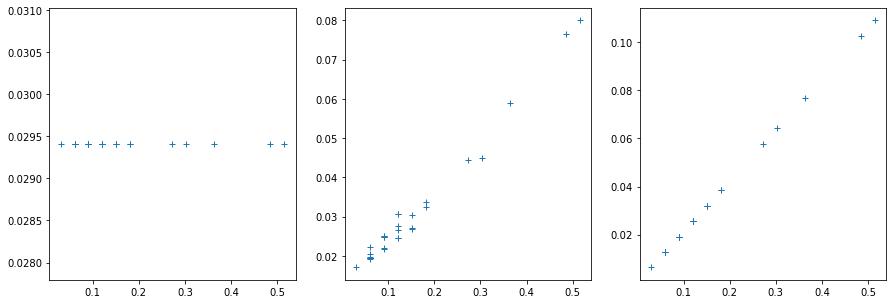

In [8]:
fig = plt.figure(1, figsize=(15,5))

d = nx.degree_centrality(G)
d = d.values()

ax = plt.subplot(131)    
pr = nx.pagerank(G, alpha=0)
pr = pr.values()
ax.plot(d, pr, '+')

ay = plt.subplot(132)    
pr = nx.pagerank(G, alpha=0.5)
pr = pr.values()
ay.plot(d, pr, '+')

az = plt.subplot(133)    
pr = nx.pagerank(G, alpha=1)
pr = pr.values()
az.plot(d, pr, '+')

## Task 2 

Experiment several teleportation vectors on the coappearance network of characters in the novel _Les Misérables_ (V. Hugo). The graph is in the file `lesmis.gml`. It was compiled by Donald Knuth [1]. Try to focus on several famous characters (Valjean, Javert, Gavroche, Cosette), or use betweenness centrality (is degree centrality of interest here?) for the teleportation. Each time, draw the network induced by nodes with high page rank. What can you observe?


[1] D. E. Knuth, _The Stanford GraphBase: A Platform for Combinatorial Computing_, Addison-Wesley, Reading, MA (1993).

In [9]:
G = nx.read_gml('lesmis.gml')

Compute betweenness centrality:

In [10]:
teleportation = nx.betweenness_centrality(G)

In [11]:
pr = nx.algorithms.link_analysis.pagerank_alg.pagerank(G, personalization=teleportation)

In [12]:
nodes = []
for key, val in pr.items():
    if val > 0.01:
        nodes.append(key)
print(nodes)

['Myriel', 'Valjean', 'Tholomyes', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Eponine', 'Gavroche', 'Gillenormand', 'MlleGillenormand', 'Marius', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Brujon']


In [13]:
G_1 = nx.Graph.subgraph(G, nodes=nodes)

In [14]:
labels = {}
for node in G_1.nodes():
    labels[node] = node

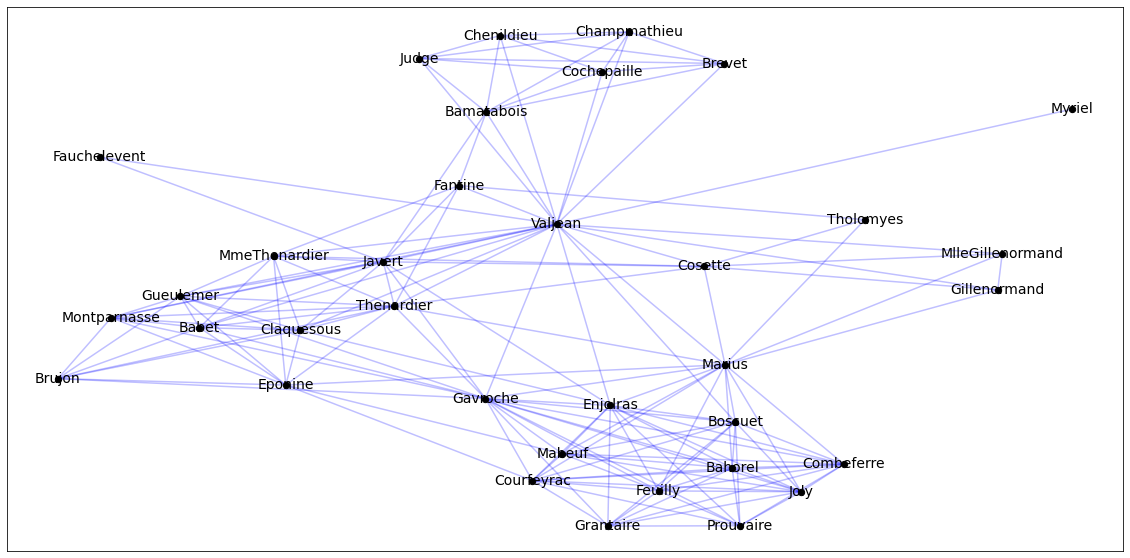

In [15]:
plt.figure(figsize=(20, 10))

pos = nx.spring_layout(G_1)
nx.draw_networkx_edges(G_1, pos, width=1.5, alpha=0.25, edge_color='blue')
nx.draw_networkx_nodes(G_1, pos=pos, node_color='black', node_size=40)
nx.draw_networkx_labels(G_1, pos=pos, labels=labels, font_size=14, font_color='black')
plt.show()

In [16]:
nodes = []
for key, val in pr.items():
    if val > 0.02:
        nodes.append(key)
print(nodes)

['Myriel', 'Valjean', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Gavroche', 'Marius', 'Enjolras', 'Bossuet']


In [17]:
G_2 = nx.Graph.subgraph(G, nodes=nodes)

In [18]:
labels = {}
for node in G_2.nodes():
    labels[node] = node

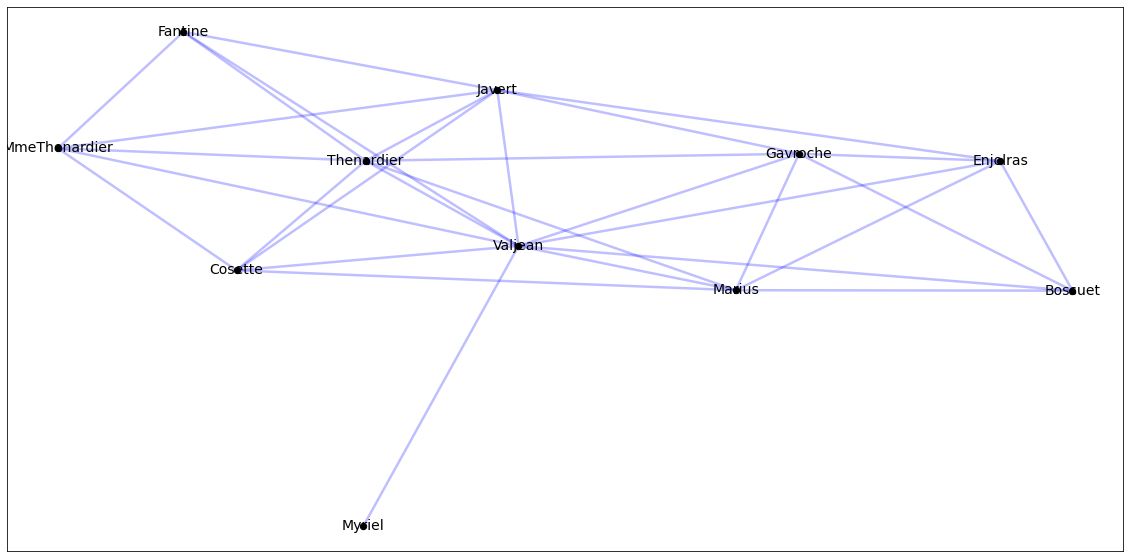

In [19]:
plt.figure(figsize=(20, 10))

pos = nx.spring_layout(G_2)
nx.draw_networkx_edges(G_2, pos, width=2.5, alpha=0.25, edge_color='blue')
nx.draw_networkx_nodes(G_2, pos=pos, node_color='black', node_size=40)
nx.draw_networkx_labels(G_2, pos=pos, labels=labels, font_size=14, font_color='black')
plt.show()

In [20]:
nodes = []
for key, val in pr.items():
    if val > 0.03:
        nodes.append(key)
print(nodes)

['Myriel', 'Valjean', 'Fantine', 'Thenardier', 'Javert', 'Gavroche', 'Marius']


In [21]:
G_3 = nx.Graph.subgraph(G, nodes=nodes)

In [22]:
labels = {}
for node in G_3.nodes():
    labels[node] = node

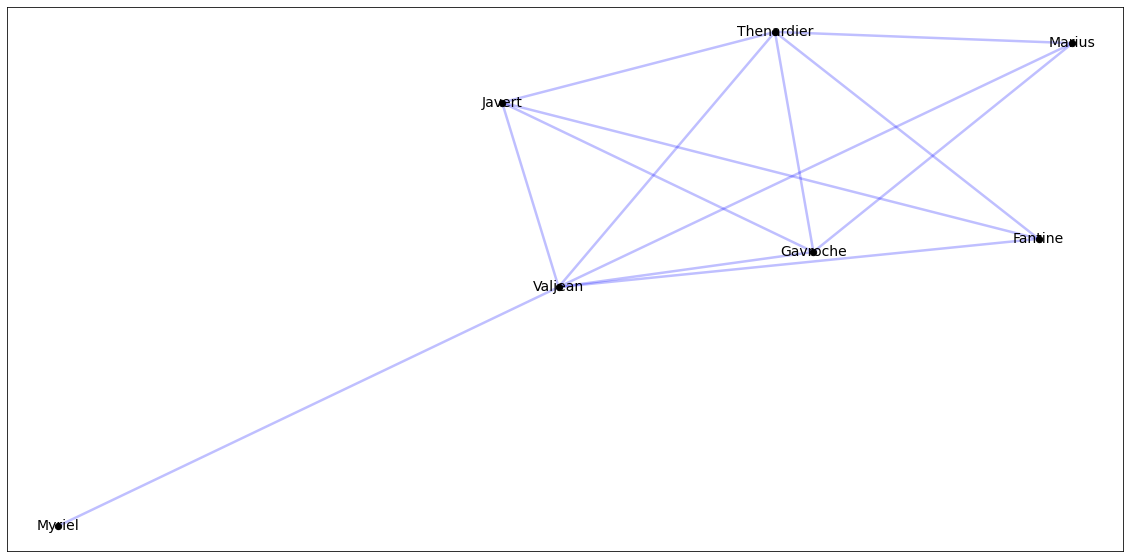

In [23]:
plt.figure(figsize=(20, 10))

pos = nx.spring_layout(G_3)
nx.draw_networkx_edges(G_3, pos, width=2.5, alpha=0.25, edge_color='blue')
nx.draw_networkx_nodes(G_3, pos=pos, node_color='black', node_size=40)
nx.draw_networkx_labels(G_3, pos=pos, labels=labels, font_size=14, font_color='black')
plt.show()

## Task 3

Let us now focus on larger networks. First let us read the network of political blogs.

In [24]:
#Some arcs are multi and it prevents some algorithms to work. We thus simplify it.

G = nx.read_gml('polblogs.gml')
A = nx.adjacency_matrix(G)
M = A.astype(bool).astype(int) #converts non-zero entries to True and then True to 1.
H = nx.DiGraph(M)
L = list(G)
mapping={}
for i in range(len(L)):
    mapping[i]=L[i]
Gsimp=nx.relabel_nodes(H,mapping) #relabel vertices with original names.

Run the HITS algorithm on `Gsimp` and plot the hubs score against the authorities score.

In [25]:
(h, a) = nx.hits(Gsimp)

Text(0, 0.5, 'Auth')

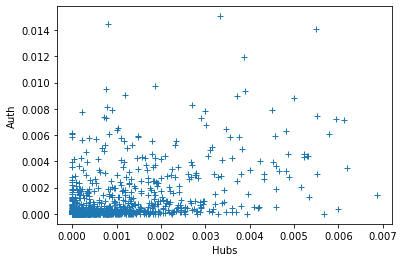

In [26]:
la = list(a.values())
lh = list(h.values())
plt.plot(lh,la, '+')
plt.xlabel('Hubs')
plt.ylabel('Auth')

Vizualize top Authorities colored in blue with sizes proportional to A-value and their common Hubs coloured in green with size proportional to H-value.

In [27]:
a_new = {}
for key, val in a.items():
    if val >= 0.008:
        a_new[key] = val

In [28]:
a_labels = {}
a_sizes = []
for node in Gsimp.nodes():
    if node in a_new:
        a_labels[node] = node
        a_sizes.append(a_new[node])

In [29]:
h_new = {}
for key, val in h.items():
    if val >= 0.005:
        h_new[key] = val

In [30]:
h_labels = {}
h_sizes = []
for node in Gsimp.nodes():
    if node in h_new:
        h_labels[node] = node
        h_sizes.append(h_new[node])

In [31]:
a_sizes = list(np.array(a_sizes) * 50000)
h_sizes = list(np.array(h_sizes) * 50000)

edges = nx.algorithms.boundary.edge_boundary(Gsimp, h_labels, a_labels)

In [ ]:
edges_list = []
for e in edges:
    edges_list.append(e)

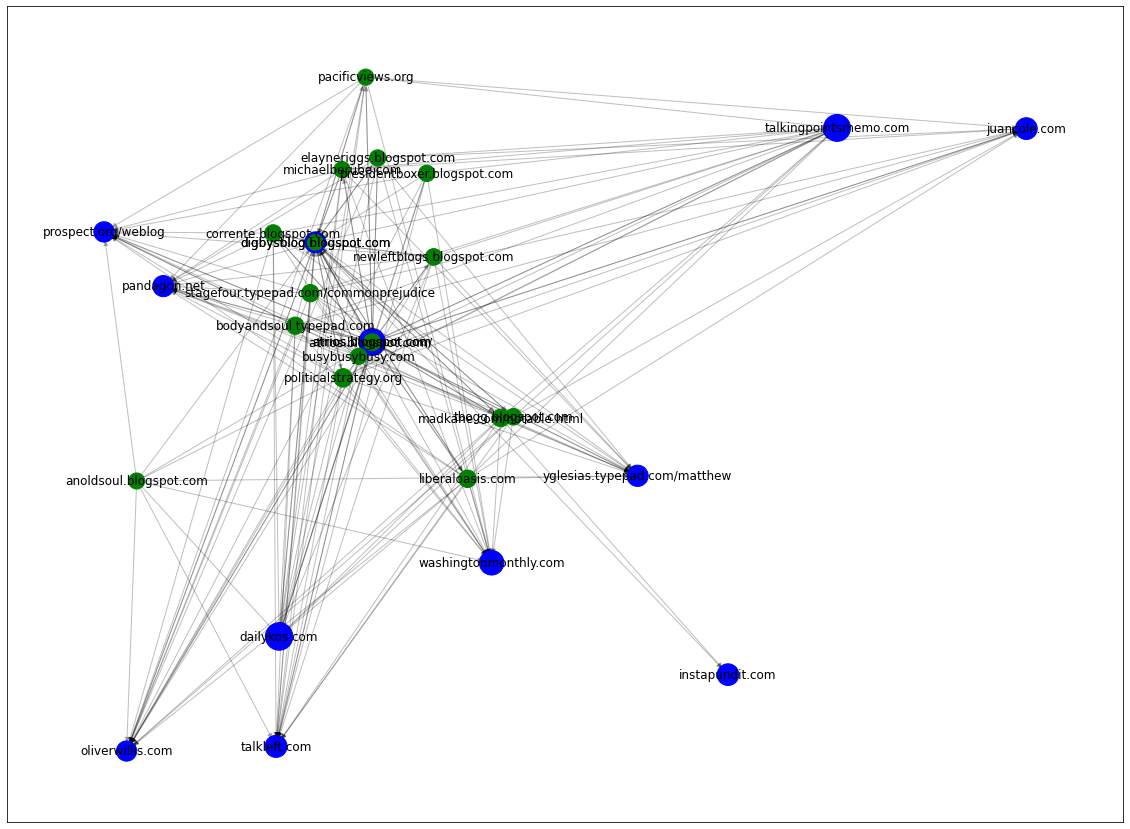

In [34]:
plt.figure(figsize=(20, 15))
    
pos = nx.spring_layout(Gsimp)

nx.draw_networkx_edges(Gsimp, pos, edgelist=edges_list, alpha=0.25, edge_color='black')
nx.draw_networkx_nodes(Gsimp, nodelist=a_labels, pos=pos, node_color='blue', node_size=a_sizes)
nx.draw_networkx_labels(Gsimp, pos, a_labels, font_size=12, font_color='black')
nx.draw_networkx_nodes(Gsimp, nodelist=h_labels, pos=pos, node_color='green', node_size=h_sizes)
nx.draw_networkx_labels(Gsimp, pos, h_labels, font_size=12, font_color='black')
plt.show()